# Image Processing: Histogram of Oriented Gradients (HOG)

This code example uses the `skimage` library to perform image operations and HOG.

Refer to this link: https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f

In [1]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(img):
    # show image and return shape
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img.shape

def log_transform(img, c = 1):
    # log transform
    log_img = c * np.log(1 + img)
    log_img[log_img >= 255] = 255
    return log_img

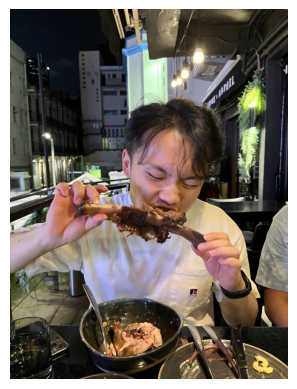

(4032, 3024, 3)

In [3]:
# load in image
# img = imread("image.png")
img = imread("sam.png")
show_image(img)

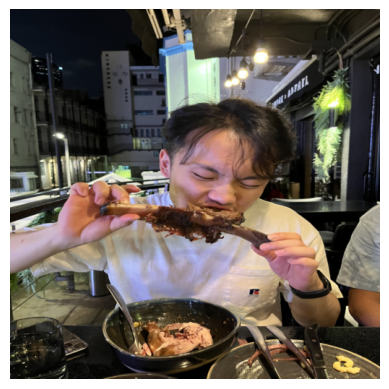

(512, 512, 3)

In [4]:
# resize image
ONETWENTYEIGHT = 128
SCALE = 4

img = resize(img, (ONETWENTYEIGHT * SCALE, ONETWENTYEIGHT * SCALE))
show_image(img)

The `channel_axis` parameter specifies the dimension where the color channels are found.

C:\Users\fongc\AppData\Local\Temp\ipykernel_13148\3848966726.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


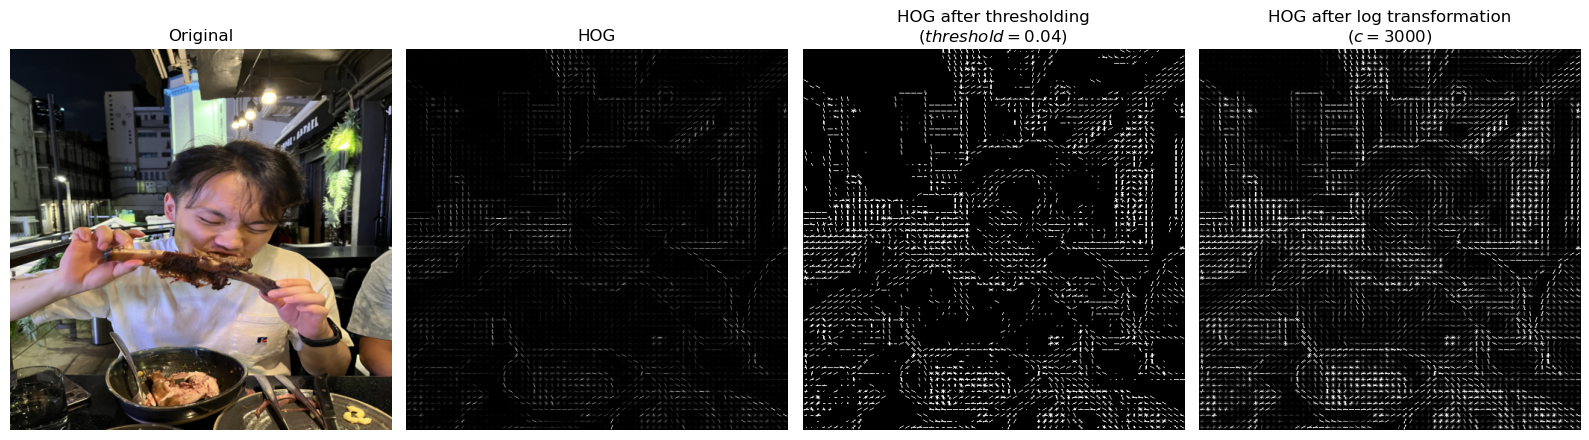

In [15]:
THRESHOLD = 0.04
C = 3000

fd, hog_image = hog(
    img,
    orientations = 9,
    pixels_per_cell = (8, 8),
    cells_per_block = (2, 2),
    visualize = True,
    channel_axis = -1
)
# hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 255))
# hog_image = exposure.equalize_adapthist(hog_image)
threshold_hog = np.copy(hog_image)
threshold_hog[threshold_hog >= THRESHOLD] = 255

log_hog = np.copy(hog_image)
log_hog = log_transform(log_hog, C)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16, 6), sharex = True, sharey = True)

ax1.imshow(img)
ax1.set_title("Original")
ax1.axis("off")

ax2.imshow(hog_image, cmap = 'gray')
ax2.set_title("HOG")
ax2.axis("off")

ax3.imshow(threshold_hog, cmap = 'gray')
ax3.set_title("HOG after thresholding\n($threshold={}$)".format(THRESHOLD))
ax3.axis("off")

ax4.imshow(log_hog, cmap = 'gray')
ax4.set_title("HOG after log transformation\n$(c={})$".format(C))
ax4.axis("off")

fig.tight_layout()
fig.show()

In [16]:
print(hog_image.shape)

(512, 512)


## Orientations

C:\Users\fongc\AppData\Local\Temp\ipykernel_13148\3054344609.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


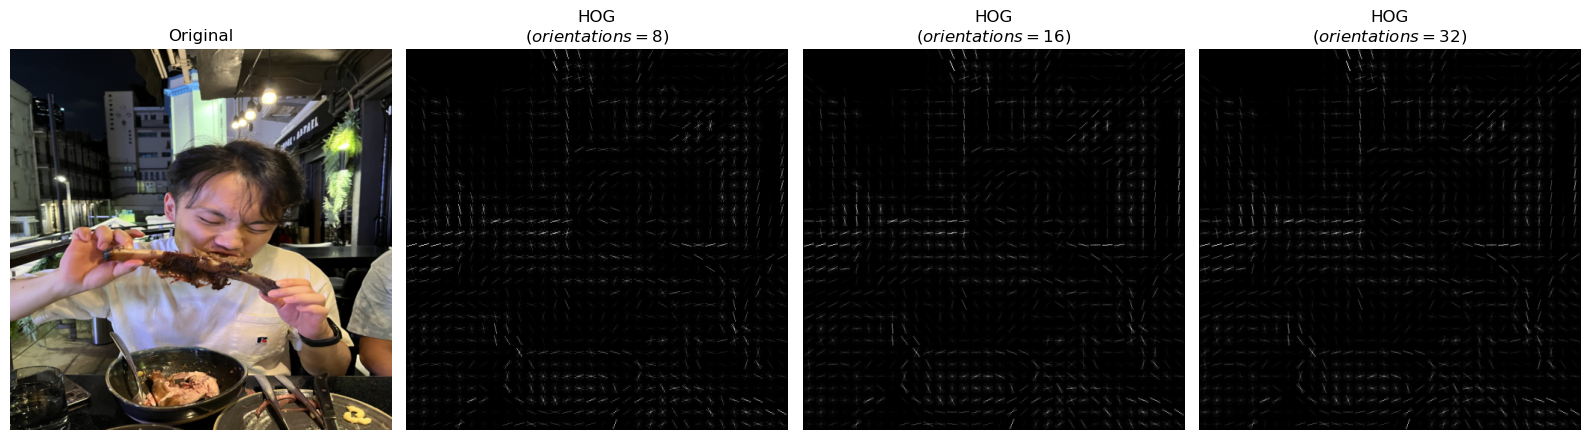

In [17]:
ORIENTATIONS = [None, 8, 16, 32]

# plot orientations in the same subplot
fig, axes = plt.subplots(1, len(ORIENTATIONS), figsize=(4 * len(ORIENTATIONS), 6), sharex = True, sharey = True)
for i, (ax, o) in enumerate(zip(axes, ORIENTATIONS)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = o,
            pixels_per_cell = (16, 16),
            cells_per_block = (1, 1),
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($orientations = {}$)".format(o))
    ax.axis("off")

fig.tight_layout()
fig.show()

## Pixels per cell

C:\Users\fongc\AppData\Local\Temp\ipykernel_13148\3534858410.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


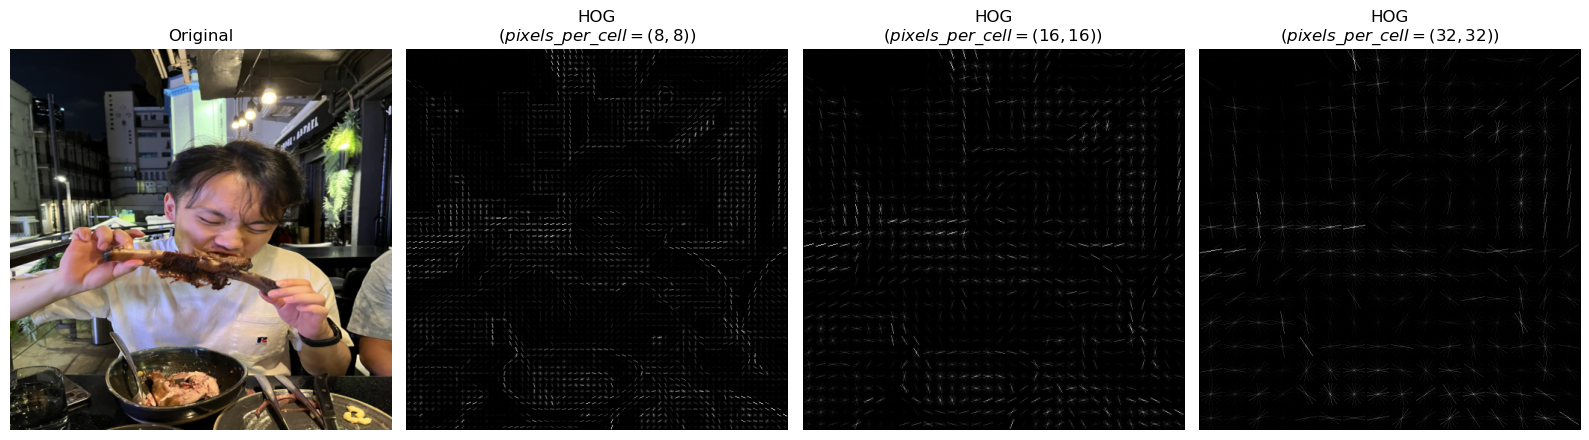

In [18]:
PIXELS_PER_CELL = [None, (8, 8), (16, 16), (32, 32)]

# plot pixels per cell in the same subplot
fig, axes = plt.subplots(1, len(PIXELS_PER_CELL), figsize=(4 * len(PIXELS_PER_CELL), 6), sharex = True, sharey = True)
for i, (ax, ppc) in enumerate(zip(axes, PIXELS_PER_CELL)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = 8,
            pixels_per_cell = ppc,
            cells_per_block = (1, 1),
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($pixels\_per\_cell = {}$)".format(ppc))
    ax.axis("off")

fig.tight_layout()
fig.show()

## Cells per block

C:\Users\fongc\AppData\Local\Temp\ipykernel_13148\3162603712.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


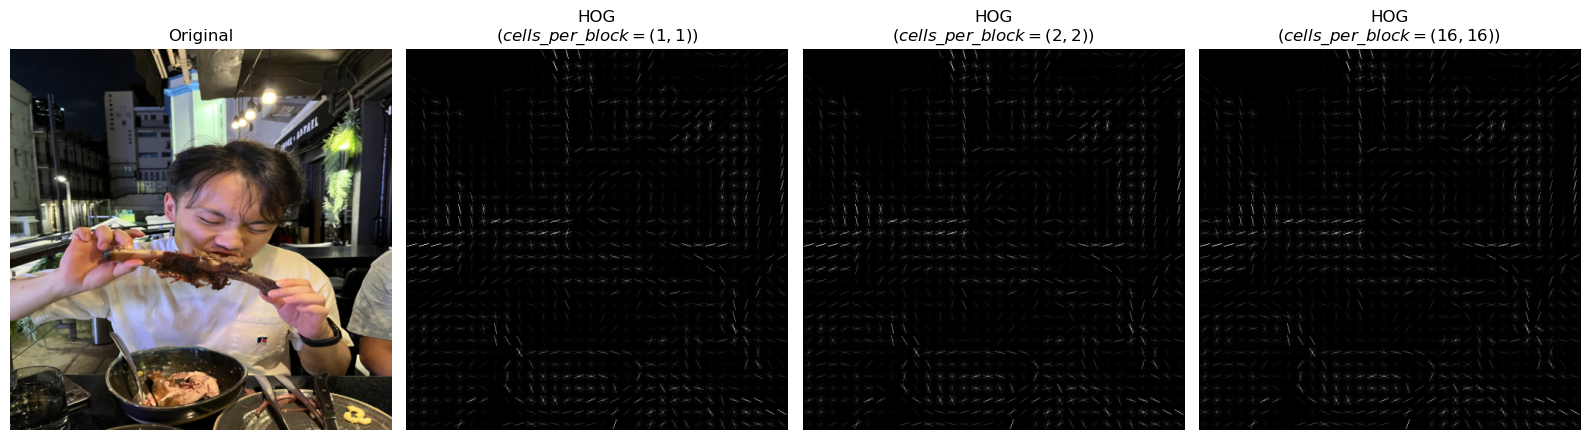

In [19]:
CELLS_PER_BLOCK = [None, (1, 1), (2, 2), (16, 16)]

# plot pixels per cell in the same subplot
fig, axes = plt.subplots(1, len(CELLS_PER_BLOCK), figsize=(4 * len(CELLS_PER_BLOCK), 6), sharex = True, sharey = True)
for i, (ax, cpb) in enumerate(zip(axes, CELLS_PER_BLOCK)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = 8,
            pixels_per_cell = (16, 16),
            cells_per_block = cpb,
            visualize = True,
            channel_axis = -1
        )
        hog_image = exposure.rescale_intensity(hog_image, in_range = (0, 10))
        ax.imshow(hog_image, cmap = "gray")
        ax.set_title("HOG\n($cells\_per\_block = {}$)".format(cpb))
    ax.axis("off")

fig.tight_layout()
fig.show()